## SVM

### For all companies measure acc, f1 for different lags using different columns

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tools import create_vectors, create_x_y

In [2]:
VITAL_COLS = ["date_", "ticker", "close", "diffs", "bin_2", "bin_3", "bin_5"]
LAGS = [3, 6, 10, 16]
COMPANIES = ["amzn", "aapl", "tsla", "msft", "goog", "googl"]

In [26]:
def measure(x, y):
    clf = SVC()

    params = {
        'max_depth': [2, 3, 5, 10, 20, 50, 100, 200],
        'min_samples_leaf': [2, 3, 5, 10],
        'criterion': ["gini", "entropy"]
    }
    time_split = TimeSeriesSplit(n_splits=5)

    tree_search = GridSearchCV(
        clf,
        param_grid=params,
        cv=time_split,
        verbose=1,
        n_jobs=4,
    )
    split = int(0.8 * len(x))
    tree_search.fit(x[:split], y[:split])
    y_pred = tree_search.predict(x[split:])
    
    acc = accuracy_score(y[split:], y_pred)
    f1 = f1_score(y[split:], y_pred, average="weighted")
    
    return f1, acc

In [36]:
df = pd.read_csv("../datasets/relevant/amzn.csv", parse_dates=["date_"])

In [21]:
grid = find_best_hyper(df)

KeyboardInterrupt: 

In [74]:
grid.best_params_

{'svc__C': 1000, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

0    1722
dtype: int64


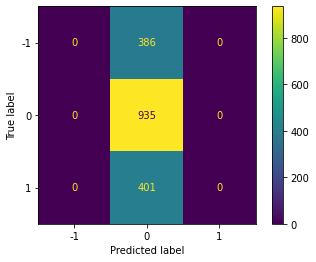

In [27]:
col = "bin_3"
cm = measure_conf_matrix(*create_x_y(df, x_cols=['diffs'], y_col=col))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(df[col].unique()))
disp.plot()

plt.show()

In [49]:
x, y = create_x_y(df, x_cols=['diffs'], y_col='bin_3')

print(*x[:4], sep='\n')
print(y[:3])

[-1.454452666496553, 0.2556965302952019, -0.4358353510896084, -0.0162127107652287, -0.1070212420950289]
[0.2556965302952019, -0.4358353510896084, -0.0162127107652287, -0.1070212420950289, 0.1623271216154798]
[-0.4358353510896084, -0.0162127107652287, -0.1070212420950289, 0.1623271216154798, -1.520160767535328]
[-0.0162127107652287, -0.1070212420950289, 0.1623271216154798, -1.520160767535328, -0.177730967975509]
[0, -1, 0]


In [53]:
df['diffs'].head(10)

0   -1.454453
1    0.255697
2   -0.435835
3   -0.016213
4   -0.107021
5    0.162327
6   -1.520161
7   -0.177731
8   -0.075835
9   -0.478453
Name: diffs, dtype: float64

In [6]:
df["bin_3"].head()

0   -1
1    1
2   -1
3    0
4    0
Name: bin_3, dtype: int64

In [15]:

df2 = pd.DataFrame({'X':x, 'y': y})
df2.head()
df2.to_csv('dane_wieczorek.csv', index=True)

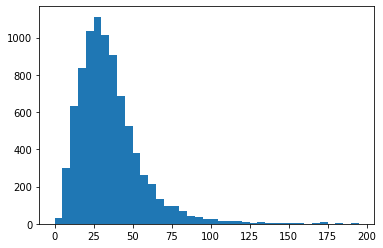

In [131]:
from matplotlib import pyplot as plt

plt.hist(df["count"], bins=[i for i in range(0, 200, 5)])
plt.show()

In [112]:
res = measure(df, 2, [3, 16])
print_results(res)

Lag 3: 0/10
Lag 3: 1/10
Lag 3: 2/10
Lag 3: 3/10
Lag 3: 4/10
Lag 3: 5/10
Lag 3: 6/10
Lag 3: 7/10
Lag 3: 8/10
Lag 3: 9/10
Lag 16: 0/10
Lag 16: 1/10
Lag 16: 2/10
Lag 16: 3/10
Lag 16: 4/10
Lag 16: 5/10
Lag 16: 6/10
Lag 16: 7/10
Lag 16: 8/10
Lag 16: 9/10
3 {'baseline': 0.5119, 'low': (0.5119, '-'), 'vol': (0.5119, '-'), 'max_pos': (0.5087, '-'), 'std_neg': (0.5119, '-'), 'std_pos': (0.5128, '+'), 'mean_comp': (0.525, '+'), 'mean_neg': (0.5392, '+'), 'mean_pos': (0.5173, '+'), 'median_comp': (0.5115, '-'), 'count': (0.5122, '+')}
16 {'baseline': 0.5105, 'low': (0.5068, '-'), 'vol': (0.5109, '+'), 'max_pos': (0.5122, '+'), 'std_neg': (0.5128, '+'), 'std_pos': (0.5108, '+'), 'mean_comp': (0.5236, '+'), 'mean_neg': (0.5278, '+'), 'mean_pos': (0.5189, '+'), 'median_comp': (0.5028, '-'), 'count': (0.5121, '+')}


In [118]:
results = {}
for company in COMPANIES:
    df = pd.read_csv(f"../datasets/relevant/{company}.csv", parse_dates=["date_"])
    results[company] = {}
    results[company][2] = create_and_predict(*create_vectors(df, main_col="bin_2"))
    results[company][3] = create_and_predict(*create_vectors(df, main_col="bin_3"))
    results[company][5] = create_and_predict(*create_vectors(df, main_col="bin_5"))

In [37]:
x, y = create_x_y(df, x_cols=['diffs'], y_col='bin_3')
x[:3], y[:3]

([[-1.454452666496553,
   0.2556965302952019,
   -0.4358353510896084,
   -0.0162127107652287,
   -0.1070212420950289],
  [0.2556965302952019,
   -0.4358353510896084,
   -0.0162127107652287,
   -0.1070212420950289,
   0.1623271216154798],
  [-0.4358353510896084,
   -0.0162127107652287,
   -0.1070212420950289,
   0.1623271216154798,
   -1.520160767535328]],
 [0, -1, 0])